In [41]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy import stats
import seaborn as sns


In [36]:
# Show the difference between the z and t statistics

# Population parameters
mu = 3
sigma = 2

population_size = 50000
population = np.random.normal(mu, sigma, population_size)

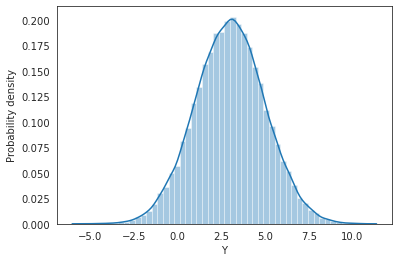

In [37]:
# So the population values are normally distributed

fig_0 = sns.distplot(population, kde = True)
fig_0.set(xlabel = 'Y', ylabel = 'Probability density');

In [38]:
# Set a sample size n
n = 10

# Draw the sampling distribution of Ybar
n_samples = 10000
Ybar_vec = np.zeros((n_samples))
for rep in range(n_samples):
    sample_from_population = np.random.choice(population, n)
    Ybar_vec[rep] = sample_from_population.mean()

print('Done drawing samples')    

Done drawing samples


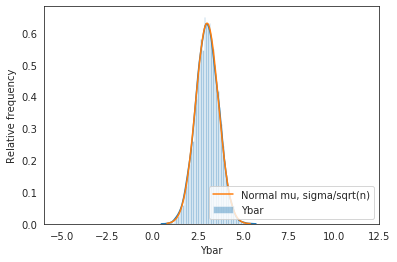

In [39]:
# The distribution of Ybar is normal, right?
fig_1 = sns.distplot(Ybar_vec, label = 'Ybar')
fig_1.set(xlim = (-6.0,12.5), xlabel = 'Ybar', ylabel = 'Relative frequency')

# What normal distribution should Ybar have? mu = mu, sure, and then what is the standard deviation? 
# sigma_Ybar = sigma/np.sqrt(n)
# Draw on top a normal distribution with these values
norm_estimate_for_Ybar = stats.norm.pdf(Ybar_vec, loc = mu, scale = sigma/np.sqrt(n))
sns.lineplot(Ybar_vec, norm_estimate_for_Ybar, label = 'Normal mu, sigma/sqrt(n)')

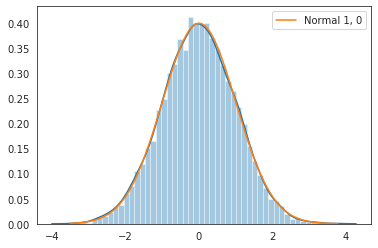

In [40]:
## Then we can convert to a standard normal distribution
Z_from_Ybar = (Ybar_vec - mu)/(sigma/np.sqrt(n))

fig_2 = sns.distplot(Z_from_Ybar)

# Does this match the standard normal exactly?
norm_estimate_for_Z = stats.norm.pdf(Z_from_Ybar, loc = 0, scale =1)
sns.lineplot(Z_from_Ybar, norm_estimate_for_Z, label = 'Normal 1, 0')

In [7]:
## Realistically, we might have an idea of what the population mean is but the standard deviation? Unlikely.
## Let's see what happens when we have to actually estimate the standard deviation from the samples we draw...

# Same as above but now compute the sample standard error each time.
# Set a sample size n
n = 5

# Draw the sampling distribution of Ybar
n_samples = 10000
Ybar_vec = np.zeros((n_samples))
SE_vec = np.zeros((n_samples))
for rep in range(n_samples):
    sample_from_population = np.random.choice(population, n)
    Ybar_vec[rep] = sample_from_population.mean()
    SE_vec[rep] = np.std(sample_from_population, ddof = 1)/np.sqrt(n)

print('Done drawing samples')    

Done drawing samples


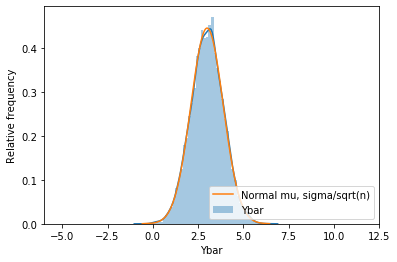

In [8]:
# The distribution of Ybar is normal, right? Yup still is...
fig_3 = sns.distplot(Ybar_vec, label = 'Ybar')
fig_3.set(xlim = (-6.0,12.5), xlabel = 'Ybar', ylabel = 'Relative frequency')

# What normal distribution should Ybar have? mu = mu, sure, and then what is the standard deviation? 
# sigma_Ybar = sigma/np.sqrt(n)
# Draw on top a normal distribution with these values
norm_estimate_for_Ybar = stats.norm.pdf(Ybar_vec, loc = mu, scale = sigma/np.sqrt(n))
sns.lineplot(Ybar_vec, norm_estimate_for_Ybar, label = 'Normal mu, sigma/sqrt(n)')

[(-5, 5)]

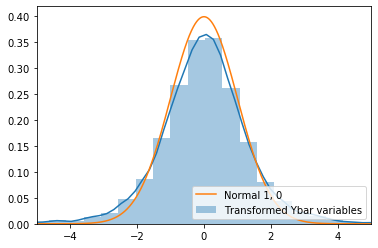

In [9]:
## Then we can convert to a standard normal distribution -- right? 
## Now we need to use our estimated standard errors instead of the true standard error.
Z_from_Ybar_est = (Ybar_vec - mu)/SE_vec

fig_4 = sns.distplot(Z_from_Ybar_est, label = 'Transformed Ybar variables')

# Does this match the standard normal exactly?
norm_estimate_for_Z_est = stats.norm.pdf(Z_from_Ybar_est, loc = 0, scale =1)
sns.lineplot(Z_from_Ybar_est, norm_estimate_for_Z_est, label = 'Normal 1, 0')
fig_4.set(xlim = (-5,5))

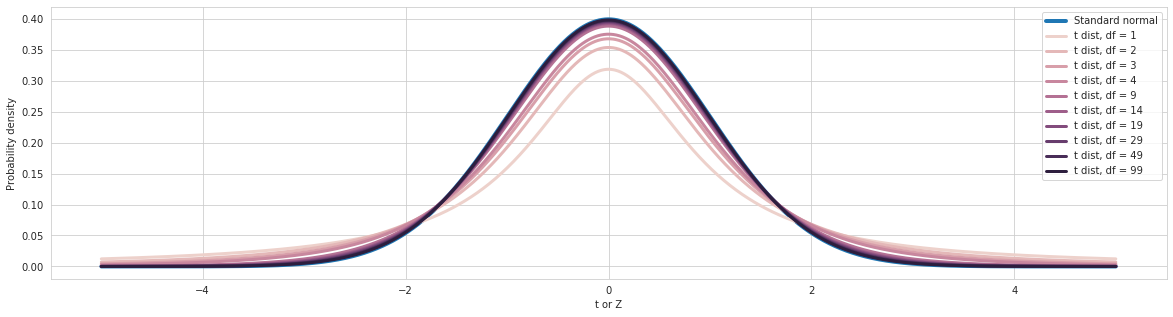

In [42]:
#### WOOOOOOOAAAHHH that's pretty different eh?
## HERE need to define the t-distribution
# How does this vary with sample size n?
## Probably pause here. go back to lecture. then pick up again.

n_values = [2, 3, 4, 5, 10, 15, 20, 30, 50, 100]

sns.set_style("whitegrid")
colors = sns.cubehelix_palette(len(n_values))
x = np.linspace(-5,5, 1000)
plt.figure(figsize=(20,5))
fig_7 = sns.lineplot(x, stats.norm.pdf(x, loc = 0, scale = 1), label = 'Standard normal', lw = 4)
for n_i, i in zip(n_values, np.arange(len(n_values))):
    df = n_i - 1
    rv = stats.t(df)
    sns.lineplot(x, rv.pdf(x), lw=3, label=f't dist, df = {df}', color = colors[i])

fig_7.set(xlabel = 't or Z', ylabel = 'Probability density')
plt.savefig('Lecture11_t_vs_z.pdf')

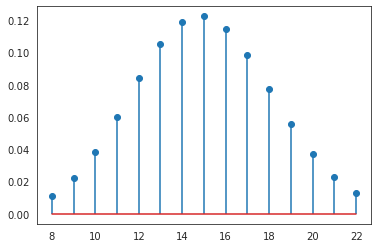

In [13]:


## For the presentation

# Plot a binomial distribution

n = 50
p = 0.3
x = np.arange(stats.binom.ppf(0.01, n, p), stats.binom.ppf(0.99, n, p))
plt.stem(x, stats.binom.pmf(x,n,p), use_line_collection = True)
plt.grid(False)
plt.savefig('Lecture11_binom_example.pdf')

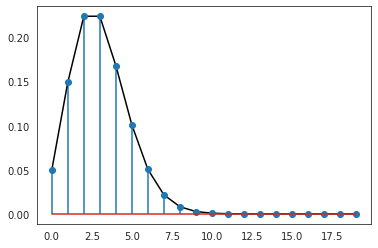

In [14]:
## Plot poisson
n = 800
p = 3
la = 3
sns.set_style('white')
x = np.arange(0,20)

plt.plot(x, stats.poisson.pmf(x, la), color = 'k')
plt.stem(x, stats.poisson.pmf(x, la), label='poisson pmf', use_line_collection = True)
plt.savefig('Lecture11_poisson.pdf')

The average temperature is 97.99024388556646
The standard devation of temperatures is 0.6673836357814591


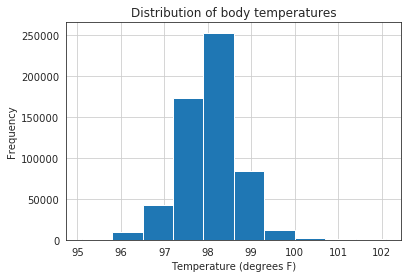

In [15]:


temp = pd.read_csv('data/combined_data.csv')
temp.head()
temp_recent = temp[temp['exam_year']> 2000]
temp_recent.head()
# Check out the distribution from our 
recent_temp_mean = temp_recent['temp'].mean()
recent_temp_stdev = np.std(temp_recent['temp'], ddof = 1)   # ddof should be 0

print(f'The average temperature is {recent_temp_mean}')
print(f'The standard devation of temperatures is {recent_temp_stdev}')

temp_recent['temp'].hist()
plt.title('Distribution of body temperatures')
plt.xlabel('Temperature (degrees F)')
plt.ylabel('Frequency');

In [34]:
#  This would be an okay in-class exercise. If there's extra time we can see if anyone gets something significant

temps_care = temp_recent['temp']
print(len(temps_care))
temps_sample = np.random.choice(temps_care, 12)

T = (temps_sample.mean() - 98.6)/np.std(temps_sample, ddof = 1)
print(T)

578222
-1.1975936075882565


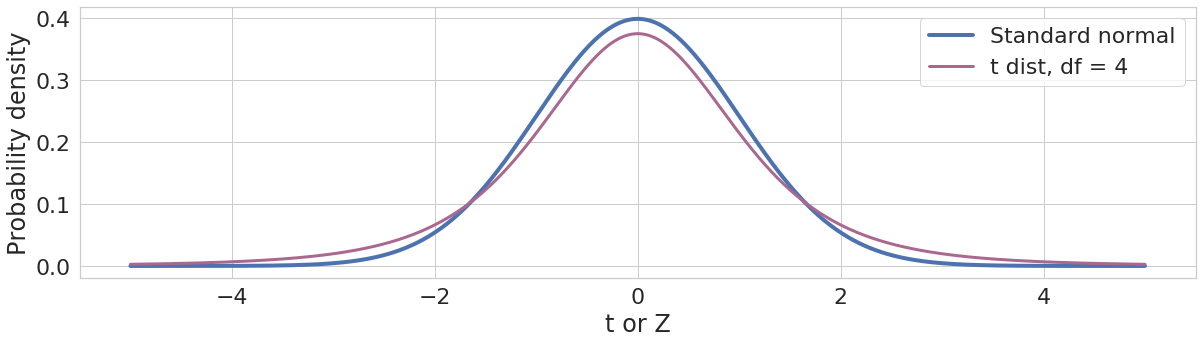

In [61]:
n_values = [5]

sns.set_style("whitegrid")
colors = sns.cubehelix_palette(len(n_values)+2)
x = np.linspace(-5,5, 1000)
plt.figure(figsize=(20,5))
fig_7 = sns.lineplot(x, stats.norm.pdf(x, loc = 0, scale = 1), label = 'Standard normal', lw = 4)
for n_i, i in zip(n_values, np.arange(len(n_values))):
    df = n_i - 1
    rv = stats.t(df)
    sns.lineplot(x, rv.pdf(x), lw=3, label=f't dist, df = {df}', color = colors[i+1])
sns.set(font_scale = 2)

fig_7.set(xlabel = 't or Z', ylabel = 'Probability density')
plt.savefig('Lecture11_t_vs_z.pdf')

In [63]:
### Seizure data from https://onlinelibrary.wiley.com/doi/full/10.1111/j.1528-1167.2007.01005.x
# Table 2

# Taking the numbers only and ignoring <, >, or other qualifiers.
# Took the mean of any range given

seizure_freq_reduction = [90, 39.5, 30, 50, 50, 50, 100, 100, 39.5, 50, 50, 100]
print(f'n is {len(seizure_freq_reduction)}')

n is 12


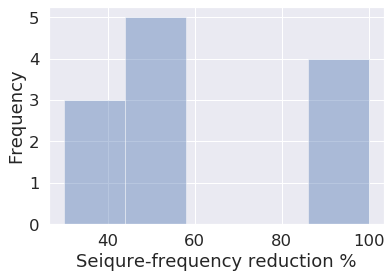

In [70]:
sns.set(font_scale = 1.5)
fig_8 = sns.distplot(seizure_freq_reduction, bins = 5, kde = False)
fig_8.set(xlabel = 'Seiqure-frequency reduction %', ylabel = 'Frequency')
plt.savefig('Lecture11_seizure_hist.pdf')

In [71]:
np.mean(seizure_freq_reduction)

62.416666666666664

In [72]:
np.std(seizure_freq_reduction, ddof = 1)/np.sqrt(len(seizure_freq_reduction))

7.721681726597432

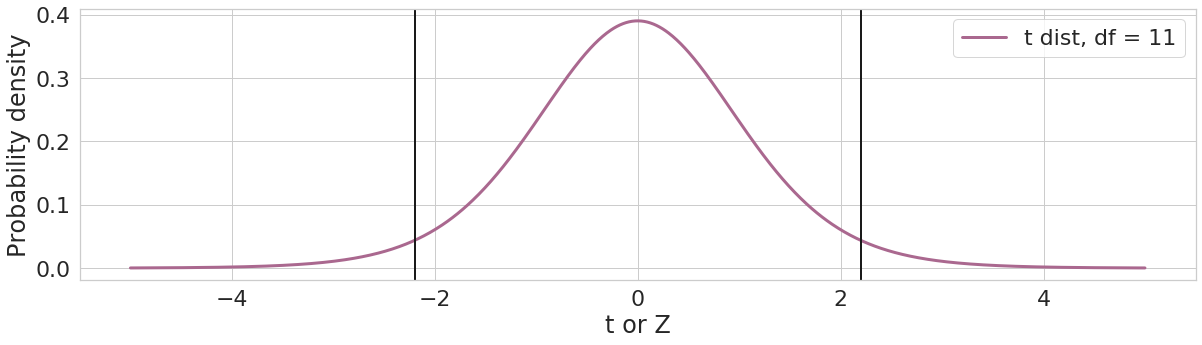

In [81]:

sns.set_style("whitegrid")
colors = sns.cubehelix_palette(len(n_values)+2)
x = np.linspace(-5,5, 1000)
plt.figure(figsize=(20,5))
df = 12 - 1
rv = stats.t(df)
fig_9 = sns.lineplot(x, rv.pdf(x), lw=3, label=f't dist, df = {df}', color = colors[i+1])
fig_9.axvline(-2.20, color = 'k', lw = 2)
fig_9.axvline(2.20, color = 'k', lw = 2, label = 'critical values')
sns.set(font_scale = 2)

fig_9.set(xlabel = 't or Z', ylabel = 'Probability density')
plt.savefig('Lecture11_dbs_example.pdf')

In [86]:
7.7*3.11 + 62.4

86.347